In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf

In [36]:
df = yf.download('AAPL','2021-01-01','2021-10-01')

[*********************100%***********************]  1 of 1 completed


In [37]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164169,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736389,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402931,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647949,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758347,105158200
...,...,...,...,...,...,...
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.048599,53477900
2021-09-27,145.470001,145.960007,143.820007,145.369995,143.518326,74150700
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.102402,108972300


In [38]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

KeyError: 'Date'

In [39]:
def EMA(data, period = 20, column = 'Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [40]:
def StochRSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up'] = up
    data['down'] = down
    AVG_Gain = EMA(data, period, column = 'up')
    AVG_Loss = abs(EMA(data, period, column='down'))
    RS = AVG_Gain/ AVG_Loss
    RSI = 100.0 - (100.0/(1.0+RS))
    
    stockrsi = (RSI - RSI.rolling(period).min())/(RSI.rolling(period).max() - RSI.rolling(period).min())
    
    return stockrsi
    

In [41]:
df['StochRSI'] = StochRSI(df)

In [42]:
df

,Open,High,Low,Close,Adj Close,Volume,up,down,StochRSI
Date,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164169,143301900,NaN,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736389,97664900,1.599991,0.000000,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402931,155088000,0.000000,-4.409996,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647949,109578200,4.320000,0.000000,NaN
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758347,105158200,1.130005,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.048599,53477900,0.089996,0.000000,0.409471
2021-09-27,145.470001,145.960007,143.820007,145.369995,143.518326,74150700,0.000000,-1.550003,0.362134
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.102402,108972300,0.000000,-3.459991,0.133157


(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871., 18901.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

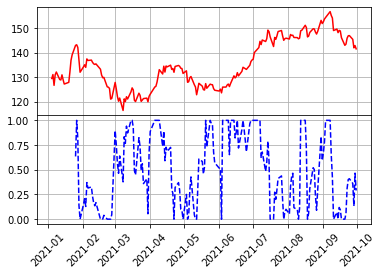

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex = True)

plt.subplots_adjust(hspace=.0)

ax1.grid()
ax2.grid()

ax1.plot( df['Close'], color='r')

ax2.plot( df['StochRSI'], color = 'b', linestyle ='--')

plt.xticks(rotation=45)

